# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

 * Consider columns:
 $$(AXB)_{[:,k]} = AXb_k = A\sum_{i=1}^mx_ib_{[i,k]} =\\= [b_{[1,k]}A, b_{[2,k]}A \ldots b_{[m,k]}A][x_1,\ldots ,x_m]^T = ([b_{[1,k]}, b_{[2,k]}, \ldots , b_{[m,k]}]\otimes A)\text{vec}(X) = (b_k^T\otimes A)\text{vec}(X) \\ 
 $$
    Then
    $$\text{vec}(AXB) = [(AXB)_{[:,1]},\ldots,(AXB)_{[:,n]}]^T = [b_1^T\otimes A,\ldots,b_n^T\otimes A]^T\text{vec}(X) = (B^\top \otimes A)\, \mathrm{vec}(X)$$
    With rowwise reshape we expect to get:
     $$\text{vec}({A} {X} {B}) = \text{vec}({X}) \left({A}^{T} \otimes {B}\right) $$
    
    Let us see:
    $$(AXB)_{[i,:]} = (a_{[i,:]} X) B = \sum_{j=1}^k a_{[i,j]} x_j B = \sum_{j=1}^k x_j (a_{[i, j]} B) = [x_1 x_2 \ldots x_k][a_{[i, 1]}B, a_{[i, 2]}B, \ldots, a_{[i, k]}B]^T = \text{vec}(X)(a_i^T \otimes B)$$

 * **Naive**:
 
    $A$ is $m \times n$, $B$ is  $p \times q$, $A \otimes B$ is $mp \times nq$ $\Rightarrow$  the complexity of $A \otimes B$ is  $O(mpnq)$. 
    
    $\text{vec}(X)$ is $nq \times 1$ $\Rightarrow$ the complexity of naive $(A \otimes B)\text{vec}(X)$ is $O(mpnq)$

    **Reduced**:
    
    Using proved quality $vec(AXB) = (B^T \otimes A) vec(X)$ and $x := \text{vec}(X)$ $(A \otimes B) x = (A \otimes B) \text{vec}(X) = \text{vec}(BX A^T)$ . So the overall complexity depends on complexity of matrix multiplication since vectorization is quadratic. Assuming sizes of matrices be equal to $n$ the asymptotic will be $O(n^3)$
    
    
* $$
S_A = [v_1, v_2, \ldots, v_n],\;\;\; \Lambda_A = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)
$$

$$
A = S_A \Lambda S_A^{-1} \Longrightarrow A S_A = S_A \Lambda_A \Longrightarrow \ A v_i = \lambda_i v_i
$$

$$
S_B = [u_1, u_2, \ldots, u_n],\;\;\;\Lambda_B = \text{diag}(\mu_1, \mu_2, \ldots, \mu_n)
$$

$$
B = S_B \Lambda S_B^{-1} \Longrightarrow B S_B = S_B \Lambda_B \Longrightarrow \ A u_i = \mu_i u_i
$$

$$
(A\otimes I + I \otimes B) (v_i \otimes u_j)= (A v_i) \otimes u_j + v_i \otimes (B u_j) = (\lambda_i v_i) \otimes u_j + v_i \otimes (\mu_j u_j) = \lambda_i(v_i \otimes u_j) + \mu_j (v_i \otimes u_j) =\\=
(\lambda_i + \mu_j) (v_i \otimes u_j)
$$

Therefore $(\lambda_i + \mu_j)$ - is eigenvalue of such matrix and $v_i \otimes u_j$ is corresponding eigenvector

* **Richardson**

$$
q = \frac{\lambda_\max - \lambda_\min}{\lambda_\max + \lambda_\min} = \frac{1000 - 0.001}{1000 + 0.001} = \frac{999999}{1000001} \\
\frac{||e_{k+1}||_2}{||e_k||_2} \leq q \\
e_k = x_* - x_k \\
x_0 = 0 \\
e_0 = x_* - x_0 = x_* \\
\frac{||x_* - x_k||_2}{||x_*||_2} \leq q^k \leq \varepsilon \\
q^k \leq \varepsilon = 10 ^{-4} \Rightarrow k \geq log_q \varepsilon \Rightarrow k \geq 4605170.2 \Rightarrow k = 4605171
$$
    **Chebyshev**

$q=\frac{\sqrt{\operatorname{cond}(A)}-1}{\sqrt{\operatorname{cond}(A)}+1}$, where $\text{cond}(A)=\frac{\lambda_{\max }}{\lambda_{\min }}=10^{6}$ 

$$||e_{k+1}||_2 \leq C q^k ||e_0||_2 \\
\frac{||e_{k+1}||_2}{||e_0||_2} \leq C q^k \leq \varepsilon \\
q^k \leq \frac{\varepsilon}{C}  \Rightarrow k \geq log_q \frac{\varepsilon}{C}  \Rightarrow k \geq 4605.2  \Rightarrow k = 4606,
$$ 
where $C=1$

**Conjugate gradient**

Since there are $1001$ of eigenvalues and conjugate method converges for that number of steps, we should expect $k \leq 1001$

In [1]:
import numpy as np
from tqdm import tqdm

##Richardson

In [3]:


diag = np.hstack([np.arange(1, 1001) / 1000, [1000]])
A = np.diag(diag)
f = np.ones(diag.shape[0])
x_real = (1 / diag) * f
x_real_norm = np.linalg.norm(x_real)
lambda_max, lambda_min = A[-1, -1], A[0, 0]

x = np.zeros(diag.shape[0])
tau = 2 / (lambda_max + lambda_min)
# conv_x = [x]
res = A @ x - f
relative_error  = []
# conv_r = [np.linalg.norm(r)]
max_iter = int(1e5)
eps = 1e-4

epoch_iterator = tqdm(range(max_iter))
for i in epoch_iterator:
    error = np.linalg.norm(x - x_real) / x_real_norm
    if error < eps:
        break
    x_old = x.copy()
    res = A @ x - f
    x = x_old - tau * res
    if i % 1000 == 0:
        relative_error.append(error)
    epoch_iterator.set_description(str(error))

0.7145274880308882: 100%|██████████| 100000/100000 [06:46<00:00, 246.03it/s]


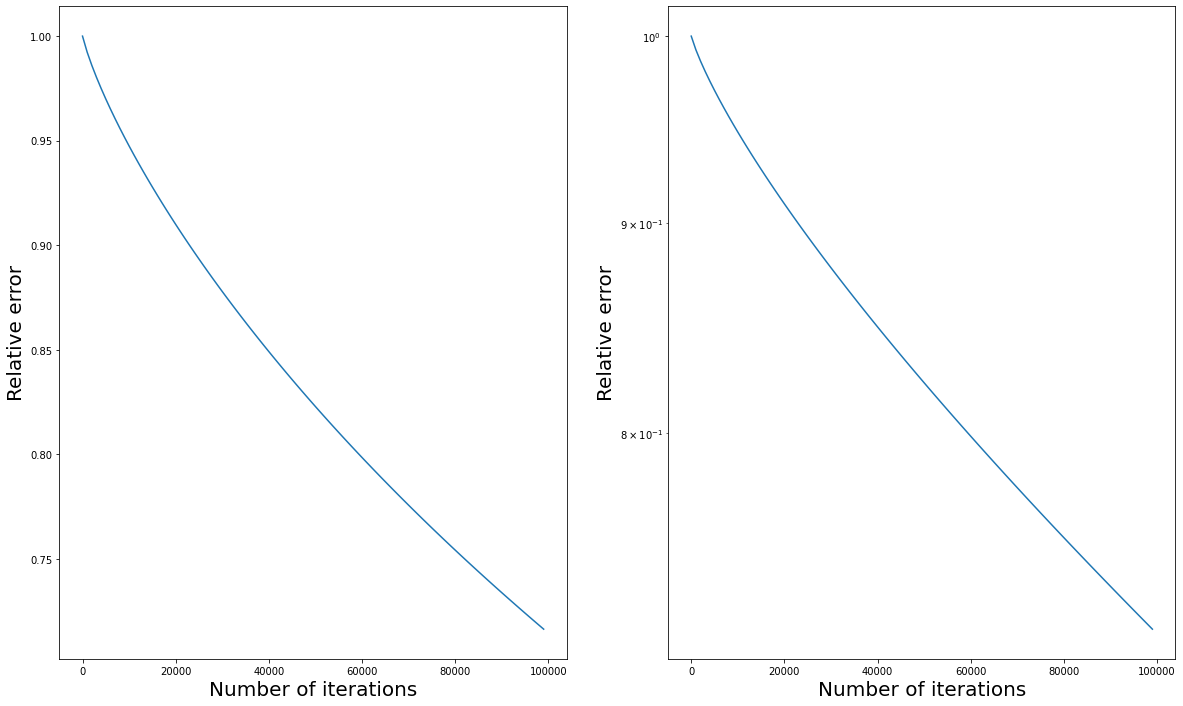

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize = (20, 12))
axes[0].plot(np.arange(len(relative_error)) * 1000, relative_error)
axes[0].set_xlabel("Number of iterations", fontsize=20)
axes[0].set_ylabel("Relative error", fontsize=20)

axes[1].semilogy(np.arange(len(relative_error)) * 1000,(relative_error))
axes[1].set_xlabel("Number of iterations", fontsize=20)
axes[1].set_ylabel("Relative error", fontsize=20)
plt.show()

As we can see, convergence of Richardson method is quite slow.

##Chebyshev

In [5]:
diag = np.hstack([np.arange(1, 1001) / 1000, [1000]])
A = np.diag(diag)
f = np.ones(diag.shape[0])
x_real = (1 / diag) * f
x_real_norm = np.linalg.norm(x_real)
lambda_max, lambda_min = A[-1, -1], A[0, 0]
niters = 10000

roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lambda_max + lambda_min - (lambda_min - lambda_max) * r) / 2 for r in roots]

x = np.zeros(1001)
res = A @ x - f
eps = 1e-4

def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

good_perm = good_shuffle([i for i in range(1, niters+1)])
i = 0

max_iter = 10000
relative_error_chebyshev = []
for i in range(max_iter):
    error = np.linalg.norm(x - x_real) / x_real_norm
    
    if error < 10**(-4):
        break
        
    x = x - 1.0/taus[good_perm[i] - 1] * res
    res = A.dot(x) - f
    if i % 100 == 0:
        relative_error_chebyshev.append(error)

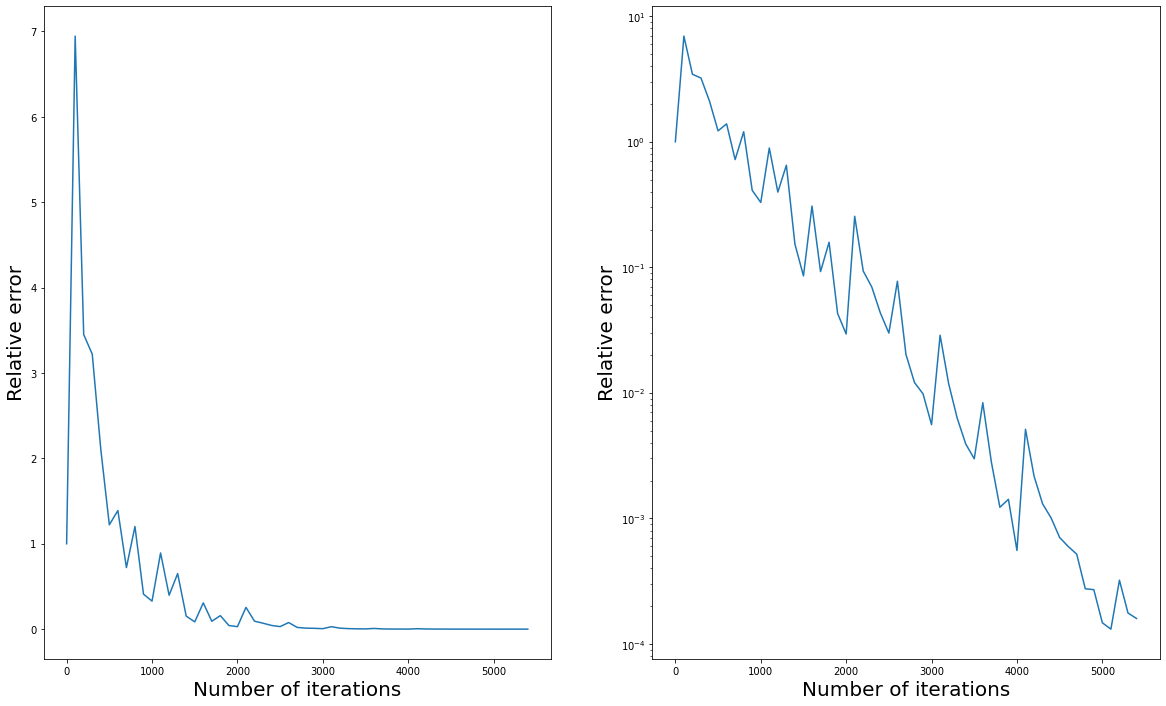

In [6]:
fig, axes = plt.subplots(ncols=2, figsize = (20, 12))
axes[0].plot(np.arange(len(relative_error_chebyshev)) * 100, relative_error_chebyshev)
axes[0].set_xlabel("Number of iterations", fontsize=20)
axes[0].set_ylabel("Relative error", fontsize=20)

axes[1].semilogy(np.arange(len(relative_error_chebyshev)) * 100,(relative_error_chebyshev))
axes[1].set_xlabel("Number of iterations", fontsize=20)
axes[1].set_ylabel("Relative error", fontsize=20)
plt.show()

As we can see the convergence of Chebyshev method is much faster

##Conjugate gradients

In [7]:
diag = np.hstack([np.arange(1, 1001) / 1000, [1000]])
A = np.diag(diag)
f = np.ones(diag.shape[0])
x_real = (1 / diag) * f
x_real_norm = np.linalg.norm(x_real)
lambda_max, lambda_min = A[-1, -1], A[0, 0]
# residual_eps = 1e-20
max_iter = int(1e4)
x0 = np.zeros(1001)

res_0 = f - A @ x0

res_prev = res_0
res_next = 0

p_prev = res_0
p_next = 0
x_prev = x0
x_next = x0

x_real_A_norm = (A @ x_real) @ x_real
CG_relative_error = []

for k in range(max_iter):
    A_dot_p_k = A @ p_prev
    alpha = (res_prev @ res_prev) / (p_prev @ A_dot_p_k)
    x_next = x_prev + alpha * p_prev
    res_next = res_prev - alpha * A_dot_p_k
    
#     if np.linalg.norm(res_next) < residaul_eps:
#         break
#     else:
    beta = (res_next @ res_next) / (res_prev @ res_prev)
    p_next = res_next + beta * p_prev
    error = ((A @ (x_next - x_real)) @ (x_next - x_real)) / (x_real_A_norm)
    CG_relative_error.append(error)
    
    if error <= eps:
        break
    
    x_prev = x_next
    p_prev = p_next
    res_prev = res_next
    


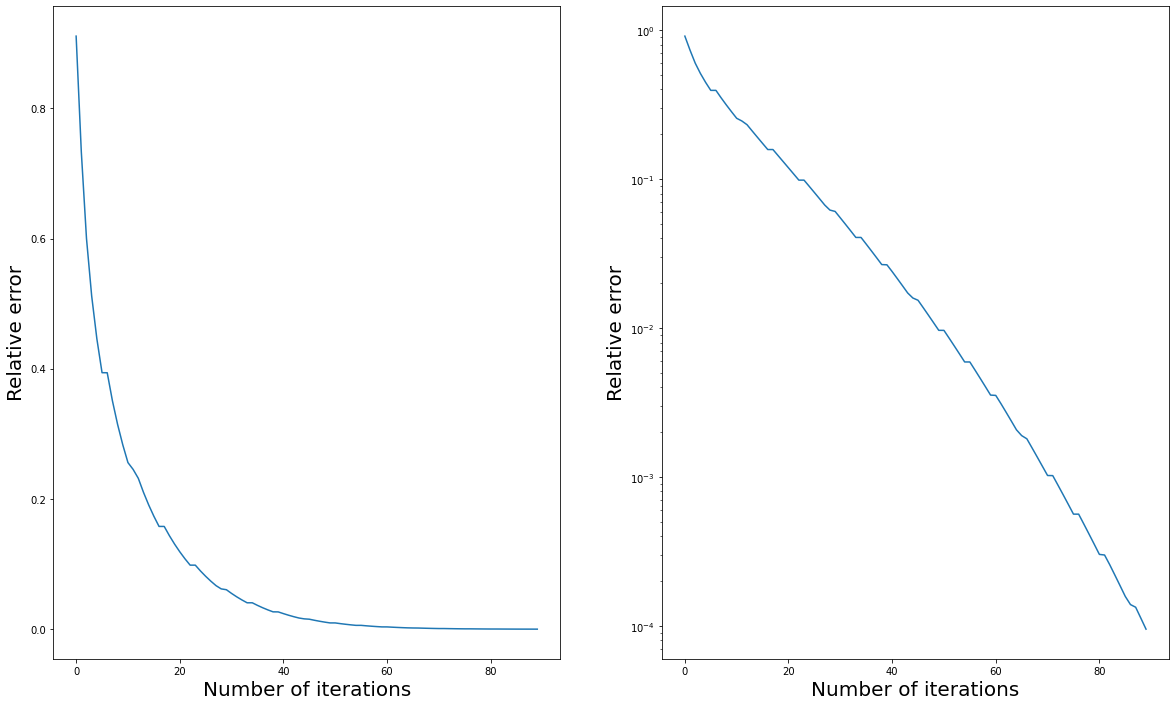

In [8]:
fig, axes = plt.subplots(ncols=2, figsize = (20, 12))
axes[0].plot(np.arange(len(CG_relative_error)) , CG_relative_error)
axes[0].set_xlabel("Number of iterations", fontsize=20)
axes[0].set_ylabel("Relative error", fontsize=20)

axes[1].semilogy(np.arange(len(CG_relative_error)),(CG_relative_error))
axes[1].set_xlabel("Number of iterations", fontsize=20)
axes[1].set_ylabel("Relative error", fontsize=20)
plt.show()

As we can see the convergence of conjugate gradients method is much faster than previous two.

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

$\Vert x - x_* \Vert^2_A = \displaystyle{\inf_p} \Vert \left(p(\Lambda) - \Lambda^{-1}\right) g \Vert_\Lambda^2 = \displaystyle{\inf_p} \displaystyle{\sum_{i=1}^n} \frac{(\lambda_i p(\lambda_i) - 1)^2 g^2_i}{\lambda_i} = \displaystyle{\inf_{q, q(0) = 1}} \displaystyle{\sum_{i=1}^n} \frac{q(\lambda_i)^2 g^2_i}{\lambda_i} $

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

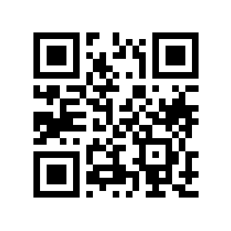

In [2]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-i_2)^2 + (j_1-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [3]:
import numpy as np
import scipy
from numba import njit, jit
from PIL import Image
from matplotlib import pyplot as plt
import scipy.sparse.linalg as spla

In [4]:
class Fourier():
    def __init__(self, alpha, n):
        self.alpha = alpha
        self.n = n
        self.matrix, self.fft_matrix= self.construct_matrix()
        
    def construct_matrix(self):
        indices = list(range(self.n)) + list(range(-self.n+1, 0))
        j, i = np.meshgrid(indices, indices)
        power = (i ** 2 + j ** 2)
        F = np.exp(-self.alpha * power) * self.alpha / np.pi
        mat_F = np.fft.fft2(F)
        return F, mat_F

    def get_matrix(self, alpha):
        if not np.isclose(alpha, self.alpha, 1e-12):
            self.alpha = alpha
            self.matrix, self.fft_matrix= self.construct_matrix()
        return self.matrix, self.fft_matrix

In [5]:
fourier = Fourier(1, n)

In [6]:
def T_matvec(x, alpha):
    F, mat_F = fourier.get_matrix(alpha)
    
    x = x.reshape((n, n))
    padded_x = np.pad(x, ((0, n-1), (0, n-1)))
    x_fft = np.fft.fft2(padded_x)
    res = np.fft.ifft2(mat_F * x_fft)[:n, :n].flatten()
    
    return res
alpha = 0.01
T = spla.LinearOperator((n**2, n**2), matvec = lambda x: T_matvec(x, alpha))
# your code is here

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [8]:
# your code is here
x_true = x.reshape(-1).copy()
alphas = [0.1, 0.01, 0.001]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
norm_true = np.linalg.norm(x_true)

xs = []
def save_error(x):
    error = np.linalg.norm(x- x_true) / norm_true
    local_errors.append(error)
    
    
for alpha in alphas:
    for tol in tols:
        local_errors = []

        y = T(x_true)
        result = spla.cg(T, y, tol=tol, callback=save_error)
        xs.append(result[0])
        print(f"With alpha {alpha} and tol {tol}, iterations number is {len(local_errors)}, relative error is {local_errors[-1]}")

With alpha 0.1 and tol 0.001, iterations number is 11, relative error is 0.12847145208381036
With alpha 0.1 and tol 0.0001, iterations number is 46, relative error is 0.10191431361088218
With alpha 0.1 and tol 1e-05, iterations number is 136, relative error is 0.09586763786282855
With alpha 0.1 and tol 1e-06, iterations number is 790, relative error is 0.07216641701693648
With alpha 0.1 and tol 1e-07, iterations number is 2427, relative error is 0.06671657765011078
With alpha 0.01 and tol 0.001, iterations number is 18, relative error is 0.21519193091811628
With alpha 0.01 and tol 0.0001, iterations number is 53, relative error is 0.20193916147301855
With alpha 0.01 and tol 1e-05, iterations number is 169, relative error is 0.19716608320867543
With alpha 0.01 and tol 1e-06, iterations number is 544, relative error is 0.1949474713695234
With alpha 0.01 and tol 1e-07, iterations number is 2424, relative error is 0.18978077250906106
With alpha 0.001 and tol 0.001, iterations number is 13,

(-0.5, 329.5, 329.5, -0.5)

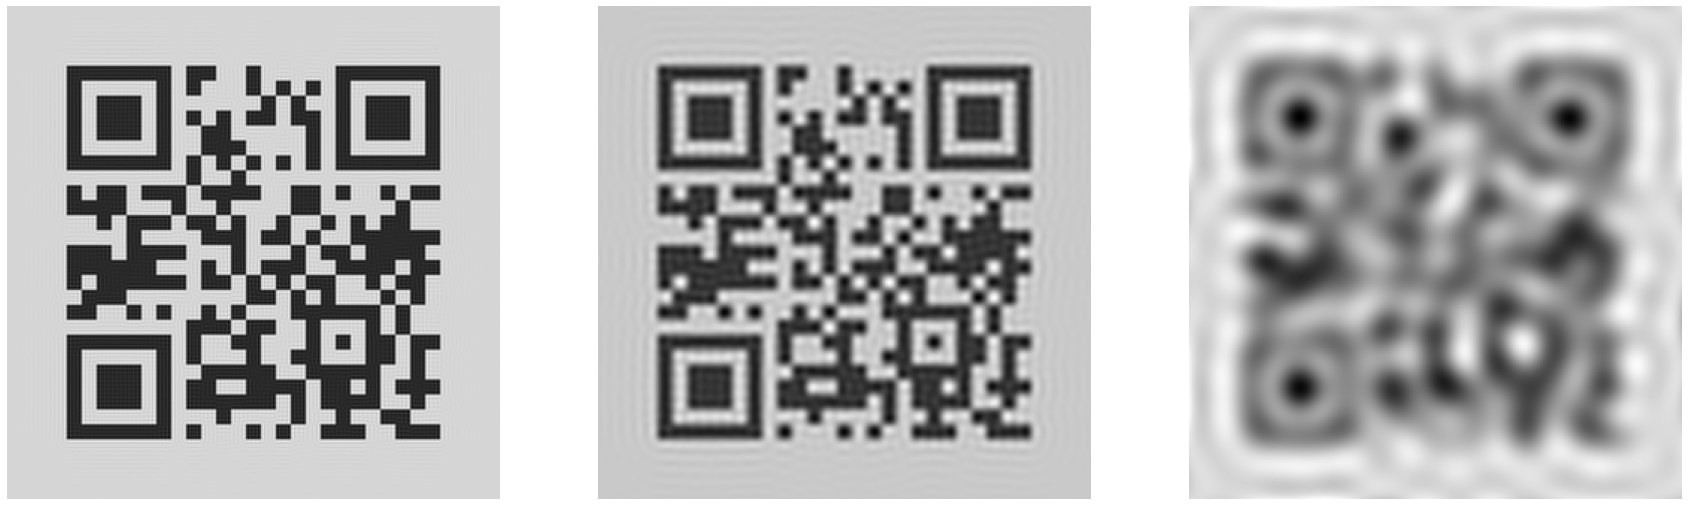

In [9]:
fig, axes = plt.subplots(ncols=3, figsize = (30, 12))
axes[0].imshow(xs[3].reshape(n, n).real, cmap='gray')
axes[0].axis('off')
axes[1].imshow(xs[9].reshape(n, n).real, cmap='gray')
axes[1].axis('off')
axes[2].imshow(xs[-3].reshape(n, n).real, cmap='gray')
axes[2].axis('off')

1) Since deconvolution is ill-posed inverse problem we can't guarantee convergence in non-exact finite arithmetic. 

2) There is no continous dependenace of solution on initial value of $\alpha$. Therefore relative error can converge to different values. 

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [10]:
# your code is here

alpha = 0.01
tol = 1e-5

noise = np.random.randn(330*330)
y = T(x_true)
y_hat = y + noise
local_errors = []
# one should stop it after a while
result = spla.cg(T, y_hat, tol=tol, callback=save_error)


KeyboardInterrupt: ignored

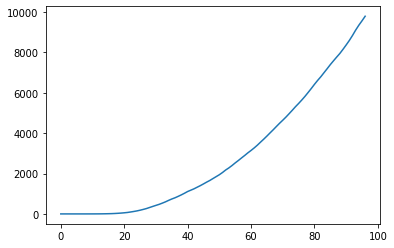

In [11]:
plt.plot(local_errors)
plt.show()

As before it is still ill-posed problem, and hence we do not have convergence.

Toe make it work one could apply regularization in order to obtain unique solution. But there are several drawbacks, such as shift from true original solution and inverse dependance of parameter of regularization - the more weight it has, the more fast convergence become, however the more difference between the obtained solution and original one appears. 


## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [12]:
def T_lmbda_matvec(x, aplha, lmbda):
    regularized = T_matvec(x, alpha)
    regularized += lmbda ** 2 * x
    return regularized

# your code is here
lmbda = 1
T_tikhonov = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lmbda))


In [13]:
# your code is here
x_true = x.reshape(-1)
lambdas = [10, 1, 0.1]
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
norm_true = np.linalg.norm(x_true)
xs = []

    
for lmbda in lambdas:
    for tol in tols:
        local_errors = []
        # y = T_tikhonov(imarray.reshape(-1))
        T_tikhonov = spla.LinearOperator((n**2, n**2), matvec = lambda x : T_lmbda_matvec(x, alpha, lmbda))

        result = spla.cg(T_tikhonov, y_hat, tol=tol, callback=save_error)
        xs.append(result[0])
        print(f"With lambda {lmbda} and tol {tol}, iterations number is {len(local_errors)}, relative error is {local_errors[-1]}")

With lambda 10 and tol 0.001, iterations number is 1, relative error is 0.9923059449626586
With lambda 10 and tol 0.0001, iterations number is 2, relative error is 0.992304201000817
With lambda 10 and tol 1e-05, iterations number is 2, relative error is 0.992304201000817
With lambda 10 and tol 1e-06, iterations number is 3, relative error is 0.9923041979846015
With lambda 10 and tol 1e-07, iterations number is 3, relative error is 0.9923041979846015
With lambda 1 and tol 0.001, iterations number is 4, relative error is 0.614596921643509
With lambda 1 and tol 0.0001, iterations number is 5, relative error is 0.6145774228512586
With lambda 1 and tol 1e-05, iterations number is 6, relative error is 0.6145760829684277
With lambda 1 and tol 1e-06, iterations number is 8, relative error is 0.6145761036929434
With lambda 1 and tol 1e-07, iterations number is 9, relative error is 0.6145761115334925
With lambda 0.1 and tol 0.001, iterations number is 19, relative error is 0.512336338778285
With

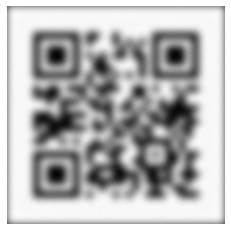

In [73]:
plt.imshow(xs[6].reshape(n, n).real, cmap='gray')
plt.axis('off')
plt.show()

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [65]:
from scipy.linalg import toeplitz, circulant

def C_inv_matvec(x, alpha, lmbda):
    F, mat_F = fourier.get_matrix(alpha)
    reg = lmbda **2 * x
    C = circulant(F[:n, 0])
    x = x.reshape((n, n))
    x_fft = np.fft.fft2(x)
    res = np.fft.ifft2(x_fft / (np.fft.fft2(C)+1e-9))[:n, :n].flatten()
    return res + reg


# your code is here

In [71]:
alpha = 0.01
lmbda = 1
tol = 1e-5
T_c_inv = spla.LinearOperator((n**2, n**2), matvec = lambda x : C_inv_matvec(x, alpha, lmbda))
y_hat_inv = T_c_inv.dot(y_hat)


local_errors = []

result = spla.cg(T_c_inv, y_hat_inv, tol=tol, callback=save_error)
print(f"With lambda {lmbda} and tol {tol}, iterations number is {len(local_errors)}, relative error is {local_errors[-1]}")

With lambda 1 and tol 1e-05, iterations number is 1, relative error is 0.9341967835573621


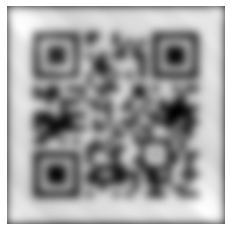

In [72]:
plt.imshow(result[0].reshape(n, n).real, cmap='gray')
plt.axis('off')
plt.show()

We can say that it converges much faster.